#### Basic Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Load DataFrame

In [15]:
data = pd.read_csv('data.csv')

### 2. Data Exploration

#### 2.1 Know shape of data

In [7]:
data.shape

(200, 3)

#### 2.2 Display 1st 5 elements of data

In [8]:
data.head(5)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


#### 2.3 Check if data contains null values

In [9]:
data.isnull()

,Index,Height(Inches),Weight(Pounds)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
195,False,False,False
196,False,False,False
197,False,False,False
198,False,False,False


#### 2.4 Display last 5 rows of the data

In [10]:
data.tail(5)

,Index,Height(Inches),Weight(Pounds)
195,196,65.80,120.84
196,197,66.11,115.78
197,198,68.24,128.30
198,199,68.02,127.47
199,200,71.39,127.88


#### 2.5 Describe the data

In [11]:
data.describe()

,Index,Height(Inches),Weight(Pounds)
count,200.000000,200.000000,200.000000
mean,100.500000,67.949800,127.221950
std,57.879185,1.940363,11.960959
min,1.000000,63.430000,97.900000
25%,50.750000,66.522500,119.895000
50%,100.500000,67.935000,127.875000
75%,150.250000,69.202500,136.097500
max,200.000000,73.900000,158.960000


#### 2.6 Info about data frame

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           200 non-null    int64  
 1   Height(Inches)  200 non-null    float64
 2   Weight(Pounds)  200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


#### 2.7 Draw correlation matrix for given data and observe that any columns are correlated or not

<AxesSubplot:>

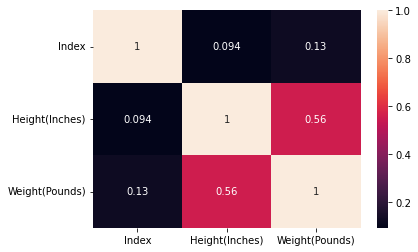

In [19]:
sns.heatmap(data.corr().abs(), annot=True)

In [73]:
x, y = data.iloc[:,:-1], data.iloc[:,-1]

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=123)

### 3. Model Building

#### 3.1 Logistic regression model

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train.astype('int'))
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
print(y_train_pred[:5],y_test_pred[:5])

[129 127 128 128 129] [128 128 128 127 129]


#### 3.2 Linear regression model

In [46]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
# print accuracy
print(y_train_pred[:5],y_test_pred[:5])

[127.02716804 132.43334635 134.43005239 137.29268358 129.79147993] [134.71790023 127.0487599  127.00247481 130.17704073 125.33362478]


#### 3.3 Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators =100)
model.fit(x_train,y_train.astype('int'))
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
print(y_train_pred[:5],y_test_pred[:5])

[141 125 122 136 129] [143 106 131 130 122]


#### 3.4  Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train.astype('int'))
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
print(y_train_pred[:5],y_test_pred[:5])

[141 125 122 136 129] [143 106 131 130 129]


### 4. Model Evaluation Metrics

#### 4.1 Confusion Matrix & Classification Report

              precision    recall  f1-score   support

          97       1.00      1.00      1.00         1
          98       1.00      1.00      1.00         1
         102       1.00      1.00      1.00         2
         103       1.00      1.00      1.00         2
         104       1.00      1.00      1.00         1
         106       1.00      1.00      1.00         4
         108       1.00      1.00      1.00         2
         109       1.00      1.00      1.00         3
         110       1.00      1.00      1.00         1
         111       1.00      1.00      1.00         2
         112       1.00      1.00      1.00         3
         113       1.00      1.00      1.00         2
         114       1.00      1.00      1.00         1
         115       1.00      1.00      1.00         6
         116       1.00      1.00      1.00         5
         118       1.00      1.00      1.00         1
         119       1.00      1.00      1.00         4
         120       1.00    

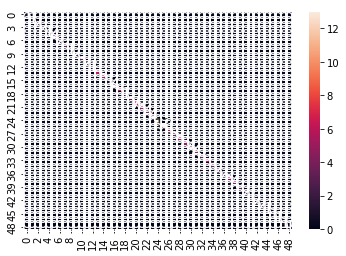

In [72]:
from sklearn import metrics 
cnfn_mtx = metrics.confusion_matrix(y_train.astype('int'), y_train_pred.astype('int'))
sns.heatmap(cnfn_mtx, annot=True, annot_kws={"size": 16}) # font size

cls_report = metrics.classification_report(y_train.astype('int'), y_train_pred.astype('int'))
print(cls_report)

In [67]:
from sklearn import metrics

# Model Accuracy
accuracy = metrics.accuracy_score(y_test.astype('int'),y_test_pred.astype('int'))
print(f"Accuracy: {accuracy}")

# Model MSE: Mean Squared Error
mse = metrics.mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=True)
print(f"MSE: {mse}")

# Model RMSE: Root Mean Squared Error
rmse = metrics.mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)
print(f"RMSE: {rmse}")

r2score = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(f"R2 Score: {r2score}")

Accuracy: 0.05
MSE: 187.93948250000003
RMSE: 13.709102177020931
R2 Score: -0.25657517072993885
